In [38]:
import pandas as pd

In [39]:

df = pd.read_csv('our-bma.csv')


In [40]:
df


,Refs,Reads
0,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
1,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
2,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
3,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
4,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...
...,...,...
8972,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
8973,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
8974,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
8975,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [41]:
from tqdm import tqdm


In [42]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [43]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [44]:
import difflib


In [45]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            
        
    #print('')


In [46]:
pairs = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 8977/8977 [00:02<00:00, 3170.95it/s]


In [47]:
import numpy as np


In [48]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [49]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G ->  @ 37 6
C ->  @ 108 6
C ->  @ 16 6
G ->  @ 3 6
G ->  @ 46 6
G ->  @ 49 6
G ->  @ 48 6
G ->  @ 41 6
G ->  @ 23 6
G ->  @ 16 6
 -> C @ 56 6
T ->  @ 64 6
T ->  @ 35 6
T ->  @ 58 6
C ->  @ 48 6
T ->  @ 51 6
T ->  @ 50 6
C ->  @ 23 6
C ->  @ 83 6
C -> T @ 72 6
C ->  @ 69 6
C ->  @ 56 6
A ->  @ 44 6
C -> T @ 69 6
A ->  @ 48 6
C -> T @ 68 6
A ->  @ 53 6
C -> T @ 59 6
T ->  @ 60 6
C -> T @ 64 6
T ->  @ 63 6
T ->  @ 77 6
G ->  @ 12 6
G ->  @ 7 6
G ->  @ 8 6
A ->  @ 86 6
G ->  @ 87 6
G ->  @ 9 6
G ->  @ 91 6
T ->  @ 66 6
G ->  @ 103 6
A ->  @ 92 6
 -> TG @ 55 6
C -> T @ 1 6
A ->  @ 78 6
C -> T @ 103 6
T ->  @ 95 6
G ->  @ 96 6
 -> AG @ 55 6
C ->  @ 81 7
C ->  @ 21 7
C ->  @ 59 7
 -> AC @ 55 7
C ->  @ 93 7
C ->  @ 49 7
C ->  @ 14 7
C ->  @ 17 7
C ->  @ 38 7
C ->  @ 30 7
 -> AT @ 53 7
C ->  @ 72 7
G ->  @ 18 7
C -> T @ 36 7
A ->  @ 47 7
G ->  @ 102 7
G ->  @ 33 7
G ->  @ 86 7
G ->  @ 30 7
T ->  @ 103 7
G ->  @ 42 7
 -> CA @ 53 7
G ->  @ 79 7
A ->  @ 56 7
 -> G @ 56 7
GG ->  @ 110 7
G ->  @ 45

In [50]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_T'])

[12, 69, 32, 23, 32, 30, 29, 33, 32, 34, 32, 38, 36, 36, 39, 28, 27, 37, 25, 36, 50, 31, 29, 40, 32, 29, 26, 22, 23, 34, 32, 49, 36, 28, 50, 48, 39, 42, 39, 41, 45, 33, 43, 42, 50, 47, 41, 49, 62, 49, 44, 76, 141, 324, 1495, 359, 125, 74, 60, 39, 43, 40, 37, 56, 63, 50, 42, 43, 51, 46, 40, 42, 41, 42, 39, 48, 46, 42, 51, 41, 37, 32, 31, 24, 28, 37, 46, 45, 40, 57, 30, 41, 48, 40, 48, 40, 41, 34, 38, 45, 30, 34, 38, 45, 39, 31, 35, 38, 27, 19, 88]


In [51]:
import matplotlib.pyplot as plt

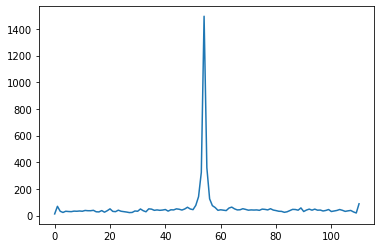

In [52]:
keys = ['G_', '_T', 'C_', '_G', '_A', '_TC']
for key in keys:
    plt.plot(range(strand_len + 1), pos_map[key])

In [53]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)